In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('historical_rainfall_data.csv')
df.head()

,StationIndex,Station,Year,Month,Day,Rainfall
0,1,Dhaka,1970,1,1,0.0
1,1,Dhaka,1970,1,2,0.0
2,1,Dhaka,1970,1,3,0.0
3,1,Dhaka,1970,1,4,0.0
4,1,Dhaka,1970,1,5,0.0


In [2]:
df.drop(df[(df['Day']>28) & (df['Month']==2) & (df['Year']%4!=0)].index,inplace=True)
df.drop(df[(df['Day']>29) & (df['Month']==2) & (df['Year']%4==0)].index,inplace=True)
df.drop(df[(df['Day']>30) & ((df['Month']==4)|(df['Month']==6)|(df['Month']==9)|(df['Month']==11))].index,inplace=True)

In [3]:
date = [str(y)+'-'+str(m)+'-'+str(d) for y, m, d in zip(df.Year, df.Month, df.Day)]


In [4]:
df.index = pd.to_datetime(date)
df['date'] = df.index
df['dayofyear']=df['date'].dt.dayofyear
df.drop('date',axis=1,inplace=True)
df.head()


,StationIndex,Station,Year,Month,Day,Rainfall,dayofyear
1970-01-01,1,Dhaka,1970,1,1,0.0,1
1970-01-02,1,Dhaka,1970,1,2,0.0,2
1970-01-03,1,Dhaka,1970,1,3,0.0,3
1970-01-04,1,Dhaka,1970,1,4,0.0,4
1970-01-05,1,Dhaka,1970,1,5,0.0,5


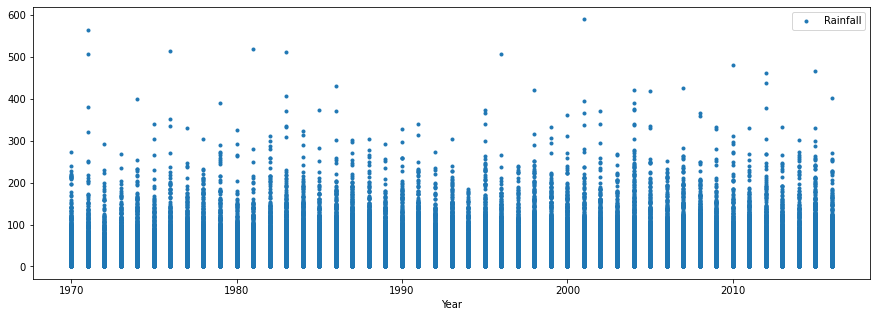

In [ ]:
df.plot(x='Year',y='Rainfall',style='.', figsize=(15,5))

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X = df[['Month','Day','Station']]
y = df['Rainfall']

#X = X[X['Station']=='Sylhet']
X = df[['StationIndex','Month','Day']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)

from sklearn.metrics import mean_squared_error

print("Mean squared error: ",mean_squared_error(y_test, y_pred))

Mean squared error:  351.3068607262034


In [6]:
#Decision Tree Model
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor



tree = DecisionTreeRegressor().fit(X_train, y_train)

y_pred = tree.predict(X_test)

from sklearn.metrics import mean_squared_error
print("Mean squared error: ",mean_squared_error(y_test, y_pred))

Mean squared error:  317.9363222665017


In [ ]:
from sklearn.svm import SVR
regressor=SVR(gamma='scale',kernel='linear')
regressor.fit(X_train,y_train)
y_pred1 = regressor.predict(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neig = KNeighborsClassifier(n_neighbors=1)
neig.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
y_pred2 = neig.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
print("Mean squared error: ",mean_squared_error(y_test, y_pred2))

Mean squared error:  761.3355303307702


In [ ]:
#MLPClasssifier
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10,10,10),max_iter=200)
mlp.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(10, 10, 10))

In [ ]:
y_pred4 = mlp.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
print("Mean squared error: ",mean_squared_error(y_test, y_pred4))

Mean squared error:  410.4744293909435


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred5 = rf.predict(X_test)

from sklearn.metrics import mean_squared_error
print("Mean squared error: ",mean_squared_error(y_test, y_pred5))

Mean squared error:  329.7653556009468


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
y_pred6 = gbr.predict(X_test)

from sklearn.metrics import mean_squared_error
print("Mean squared error: ",mean_squared_error(y_test, y_pred6))

#print(gbr.predict([[7,5]]))

Mean squared error:  330.5131475085028
[17.5912947]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


In [ ]:
import xgboost as xgb
xg_reg = xgb.XGBRegressor()
xg_reg.fit(X_train, y_train)
y_pred7 = xg_reg.predict(X_test)

from sklearn.metrics import mean_squared_error
print("Mean squared error: ",mean_squared_error(y_test, y_pred7))

[05:49:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean squared error:  330.50708084977293


In [7]:
import pickle
filename = 'trained_model.sav'
pickle.dump(tree, open(filename, 'wb'))